# Titanic

El Titanic fue un barco britanico que rompia record de mayor cantidad de pasajeros, con una capacidad de mas de 2700 pasajeros y con mas de 800 tripulantes, el mismo proporsionaba varios lujos y servicios ademas de que incorporaba lo mejor en medidas de seguridad, sin embargo, debido a varios fallos de los oficiales a cargo, termino chocando un iceberg el cual pudo dañar la cubierta y finalmente causando el hundimiento del barco lo que dejo la muerte de cientos de pasajeros.

# Proyecto

En este modulo vamos a hacer un proyecto entero de aprendizaje supervisado, pasando por todos los pasos del mismo, los cuales son:

* Definición del problema.
* Búsqueda de datos. 
* Análisis exploratorio y limpieza.
* Separación de entrenamiento y validación.
* Entrenamiento.
* Prueba.
* Presentación de resultados. 

## Definición del problema

Todo proyecto de aprendizaje automático parte de una pregunta que se quiere responder, en este caso la pregunta es:

**¿Cuál es la probabilidad de sobrevivir de un pasajero con cualidades específicas, como género, edad, nivel socioecónomico, etc. en un naufragio similar al del Titanic?**

## Búsqueda de datos
 
Los datos que usaremos se encuentran en [Kaggle](https://www.kaggle.com/c/titanic/data) (Página muy conocida y recomendada en el mundo de la ciencia de datos, con competencias, conjuntos de datos, cursos e información muy valiosa), allí deberán registrarse y aceptar las reglas de la competencia antes de poder bajarse los datos. Estos incluyen un conjunto de datos de entrenamiento (train.csv) y un conjunto de datos de prueba (test.csv) contra el cual probar nuestras predicciones. El objetivo final de analizar este dataset, será predecir de forma correcta si los pasajeros del dataset de pruebas sobreviven o no al accidente. 
 
Una vez que tengan los datos podemos subir los csv a nuestros notebooks como aprendimos en el módulo pasado. 

Primero debemos subir el conjunto de datos de entrenamiento, y durante todo el proyecto solo usaremos este conjunto de datos, el de prueba solo se usara al final una vez que se termine de entrenar y validar el modelo a usar. 

**1. ¿Qué pasa si usamos el conjunto de prueba en alguno de los pasos previos al de prueba?**

Respuesta: Si usamos el conjunto de prueba en alguno de los pasos previos al de prueba, nos dará un DataFrame con 418 filas, las cuales nos muestran los datos de otros 418 pasajeros, y 11 columnas (con las variables _PassengerId_, _Pclass_, _Name_, _Sex_, _Age_, _SibSp_, _Parch_, _Ticket_, _Fare_, _Cabin_, _Embarked_)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

filesUploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
train = pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Análisis exploratorio y limpieza.

Esta sección es fundamental y en la que se invierte más tiempo en cualquier proyecto de aprendizaje automático, debemos decidir:
* ¿Qué variables se van a usar? 
* ¿Hay que eliminar algúnas observaciones?
* ¿Hay datos faltantes? ¿Qué haremos con ellos?
* ¿Hay datos atípicos? ¿Qué haremos con ellos?
* ¿Todas las variables a usar estan limpias?
* ¿Crearemos nuevas variables?
* ¿Qué información extra podemos obtener de los datos?

Es importante tomar en cuenta que este proceso suele ser itérativo, es decir, limpiamos los datos, seleccionamos las variables, creamos algunas nuevas y revisamos, probablemente en la revisión salten algunas nuevas variables o datos atípicos, por lo que volvemos a comenzar el proceso. 

También es de vital importancia mantener registro de todo lo que se le hagan a los datos y el orden, para poder reproducir los resultados, y, más aún, por que los datos que reciba el modelo una vez puesto en producción, deben de recibir el mismo tratamiento.



**2. Describa brevemente todas las variables del conjunto de datos, sus tipos, rangos, relaciones con otras variables, etc.**

**2.1 ¿Qué información podemos concluir aplicando el método _describe_?**

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Respuesta: Aplicando el método _describe_, nos mostrará estadísticas de las variables numéricas del DataFrame (train)

**2.2 ¿Cuantos datos hay en cada clase de la variable _Pclass_?**

3    491
1    216
2    184
Name: Pclass, dtype: int64


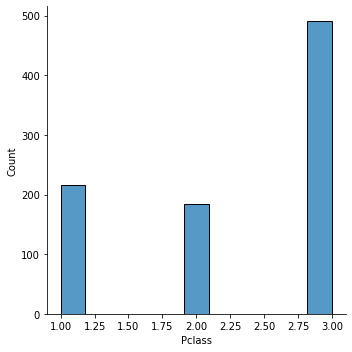

In [4]:
print(train.Pclass.value_counts())
sns.displot(data = train, x = "Pclass")

Respuesta: En la clase baja, hubo un total de 491 datos, 184 en la clase media y 216 en la clase alta.

**2.3 ¿Con que variables esta más relacionada la variable _Survived_? ¿Tiene sentido esas relaciones?**

In [5]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Las variables que están más relacionadas con la variable _Survived_ son _Pclass_, _Fare_. 

La relación entre las variables Pclass y Survived tiene sentido porque, como vimos en el anterior punto, hubieron más pasajeros en la clase baja que el resto, entonces las probabilidades de sobrevivir aumentan.

Lo mismo con la variable Fare, suponemos que tiene que ver con la Pclass, ya que si el precio del ticket es el mayor, correspondría a la clase alta, si es menor, a la clase media o baja.

**2.4 Genére alguna conclusión del análisis de una o más variables.**

####**Analizaremos las variables *Survived*, *Pclass* y *Age***

###_Survived_

In [6]:
#¿Qué tipo de variable es Survived?
print("La variable Survived es de tipo {} (Entero)".format(train.Survived.dtypes))
#comprobamos que solo existen valores 0 y 1 entre las observaciones de la variable.
print("Solo existen los valores {}".format(train.Survived.unique()))
#Por último, ¿cuántos valores nulos hay en esta variable?
print("Hay un total de {} valores nulos".format(train.Survived.isna().sum()))

La variable Survived es de tipo int64 (Entero)
Solo existen los valores [0 1]
Hay un total de 0 valores nulos


###Pclass

In [7]:
#¿Qué tipo de variable es Pclass?
print("La variable Pclass es de tipo {}".format(train.Pclass.dtypes))
#¿Cuántos valores existen en dicha variable?
print("Existen los valores {}, o sea, clase baja, alta y media".format(train.Pclass.unique()))
#¿Hay valores nulos?
print("Hay {} valores nulos en esta variable".format(train.Pclass.isna().sum()))

La variable Pclass es de tipo int64
Existen los valores [3 1 2], o sea, clase baja, alta y media
Hay 0 valores nulos en esta variable


###_Age_

In [8]:
#¿Qué tipo de variable es Age?
print("La variable Age es de tipo {}".format(train.Age.dtypes))
#Vemos que Age contine números decimales, 
#ahora importaremos un código para corroborar 
#el valor de edad de cada registro no nulo
EsEntero = True
for _, age in train.Age.dropna().iteritems():
  EsEntero = age.is_integer()
  if not EsEntero:
    break
if EsEntero:
  print("Todos los valores son enteros!")
else:
  print("No todos los valores son enteros")


La variable Age es de tipo float64
No todos los valores son enteros


Comprobamos que existen valores no enteros en esta variable, por lo que debemos decidir si quedarnos solo con la parte entera de los valores, redondearlas o seguir manejando las edades con decimales.

Para cerrar con este análisis, veremos el rango de valores de la variable:

In [ ]:
#Con el método describe() podemos ver tanto el valor 
#mínimo como el máximo, lo cual nos indica el rango.
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Vemos que el rango de valores de _Age_ es de 0,42 a 80, por lo que no tendremos inconvenientes al realizar la **limpieza de datos**

**3. ¿Qué variables del conjunto de datos original seleccionara para usar? Diga los motivos y las pruebas que se hicieron.**

In [9]:
train.drop(columns = ["Name", "PassengerId", "Ticket"])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


Usaríamos todas las variables, exceptuando *PassengerId*, *Name* y *Ticket*, debido a que nos resulta inútiles para predecir las probilidades de supervivencia de los pasajeros. Más adelante removeremos también la variable *Embarked*, pero sin antes aplicarle la limpieza correspondiente.

**4. Realice la limpieza de los datos**

**4.1 ¿Qué variables tienen datos nulos? ¿Tiene sentido que esas variables tengan datos nulos?**

In [10]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Las variables qué tienen datos nulos son *Age*, *Cabin* y *Embarked*. Si, tiene sentido que tengan datos nulos: por ejemplo, en *Cabin* pudieron haber pasajeros sin camarote asignado. Para nosotros, *Age* tiene un poco de sentido, podemos deducir que no se pudo averiguar la edad exacta de el/la pasajero/a. Por último, no tiene sentido que *Embarked* tenga 2 valores nulos.

**4.2 Proponga y ejecute una idea para imputar los datos nulos.**

###_Age_

Hay muchas estrategias para imputar los datos nulos, en nuestro caso proponemos completar los datos obteniendo valores aleatorios de la distribución.

Primero vamos a comenzar con la variable *Age*: Ubicaremos los datos en un gráfico de barras para que, luego de llenar los datos nulos, verificaremos que la modificación no sea radical.

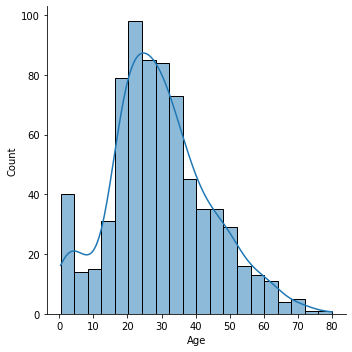

In [11]:
sns.displot(data = train, x = "Age", kde = True)

Luego, procedemos a realizar nuestro objetivo

Hay 0 valores faltantes



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


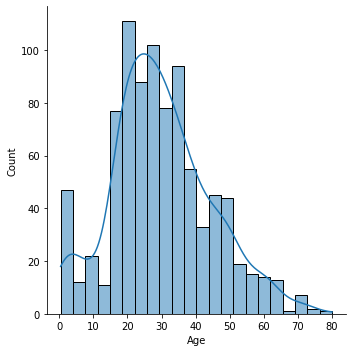

In [12]:
#1
missingValues = train.Age.isna().sum()
#2
from random import sample
#3
values = sample(train.Age.dropna().to_list(), missingValues)
#4
train.Age.loc[train.Age.isna()] = values
#5
missingValues = train.Age.isna().sum()
print("Hay {} valores faltantes".format(missingValues))
print ()
#6
sns.displot(data = train, x = "Age", kde = True)

Este proceso parece algo complejo, así que vamos por pasos:

1.   Primero, creamos una nueva variable llamda *missingValues* la cual nos dice cuantos datos faltantes hay en total (recordemos que previo a este paso contamos con 177).
2.   Para generar los datos faltantes, utilizaremos la función sample() de la librería random, dicha función nos devuelve una lista de valores al azar, elegidos de entre los elementos de una lista.
3.   En este paso definimos la cantidad de valores a devolver, que lo hacemos con la variable *misssing_values*.
4.   En el código que importamos, reemplazamos todos los valores nulos del dataset por los valores generados de la función sample().
5.   Corroboramos de que no hayan valores nulos.
6.   Finalmente, hacemos el gráfico sin valores nulos para verificar de que no hayan grandes cambios del original.

###_Cabin y Embarked_

####**Imputación de datos nulos**

Para imputar los datos nulos de Embarked, lo que hicimos fue eliminarlos con el método *dropna*. Y para Cabin, usaremos un método más complejo.
Todo esto lo demostraremos en los próximos códigos.

####**Limpieza de las variables (incluída Sex)**

Para la limpieza de estas dos variables (además de la de *Sex*), las codificaremos.

Primero, para la codificación de Embarked usaremos un método llamado "One hot encoding" esto es, en lugar de usar una sola columna y usar un valor numérico para cada opción, vamos a generar tantas columnas como diferentes valores tenga la variable, en este caso 3 (C, S y Q), y cada una de estas columnas tendrán 1 si la observación pertenece a esa categoría, 0 sino.

Para Cabin, lo explicaremos por pasos:
1.   Codificamos la variable Cabin, creando la lista letters con todas las letras del abecedario.
2.   Creamos la función _cabinENcoder_, la cual, recibe como parámetro una observación de la variable Cabin, si esta es un dato nulo regresa 0, si no regresa el valor de cabina codificado.
3.   Existen pasajeros que no tienen una cabina asignada. Dado que los camarotes llegan hasta la T (siendo A el de mayor clase y T el de menor), asignamos el valor de camarote Z a quienes no tienen un camarote asignado.  Dado que son 26 letras, cada una con incrementos de a 1000, y comenzando desde el 0 a la letra Z le corresponde el código 25000, por lo que este será el valor a devolver cuando no exista un camarote asignado.
4.   Creamos un lista con cada cabina presente en el registro.
5.   Recorremos cada cabina identificada en el dato (puede ser una o más), y sumamos su valor codificado a la variable value.
6.   Finalmente, aplicamos la variable Cabin con la nueva cabinEnconder.

In [14]:
# PUNTO APARTE "Limpieza de Sex": Codificamos la variable Sex 
# (proceso explicado en ejercicio 5).
train.Sex = train.Sex.apply(lambda x: 1 if x == "female" else 0)

# Eliminamos los valores nulos de embarked.
train.dropna(subset = ["Embarked"], inplace = True)

# 1
from string import ascii_uppercase as letters
letters = dict(zip(list(letters),list(range(26))))
 
# 2
def cabinEncoder(cabin):

# 3
  if cabin is None or cabin != cabin:
    return 25000

# 4
  cabin = cabin.split(" ")

# 5
  value = 0
  for c in cabin:
    value += (letters[c[0]] * 1000) + (int(c[1:]) if len(c) > 1 else 0)
  return value / len(cabin)

# 6
 
train.Cabin = train.Cabin.apply(cabinEncoder)
 
# Hacemos OneHotEnoding sobre la variable Embarked
def oneHotEncoder(column, prefix):
  oneHot = pd.DataFrame()
  
  for value in column.unique():
    oneHot[prefix + value] = (column == value).astype("int")
 
  return oneHot
 
train = train.join(oneHotEncoder(train.Embarked, "Embarked_"))

# Borramos las columnas que sabemos no nos serán de utilidad
train.drop(columns=["PassengerId", "Name", "Ticket", "Embarked"], inplace = True)
 
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_S,Embarked_C,Embarked_Q
0,0,3,0,22.0,1,0,7.2500,25000.0,1,0,0
1,1,1,0,38.0,1,0,71.2833,2085.0,0,1,0
2,1,3,0,26.0,0,0,7.9250,25000.0,1,0,0
3,1,1,0,35.0,1,0,53.1000,2123.0,1,0,0
4,0,3,0,35.0,0,0,8.0500,25000.0,1,0,0


Como podemos ver, todas las variables se codificaron y limpiaron, esto quiere decir que no hay valores categóricos -sino numéricos- y no poseen valores nulos. Por lo que ya podríamos realizar el modelo.

**4.3 ¿Qué variables tienen datos atípicos? ¿Estos datos, son equivocaciones oson reales? Proponga y ejecute una idea para tratar los mismos**



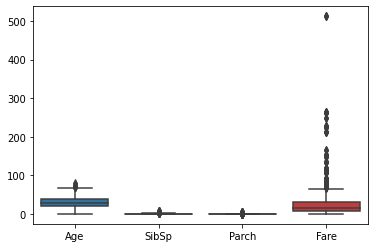

In [15]:
def is_outlier(column):
 quantiles = column.quantile([0.25,0.75])
 iqr = quantiles.diff()[0.75]
 quantiles[0.25] -= (1.5 * iqr)
 quantiles[0.75] += (1.5 * iqr)

 return sum((column < quantiles[0.25]) | (column > quantiles[0.75])) > 0

 print(train[["Age", "SibSp", "Parch", "Fare"]].apply(is_outlier))

sns.boxplot(data = train[["Age", "SibSp", "Parch", "Fare"]])

En el código importado anteriormente, podemos ver que las variables *Age*, *SibSp*, *Parch* y *Fare* tienen datos atípicos, además de ser reales. ¿Cómo propusimos esta idea? Bueno, primero utilizamos **def**, la cual es una palabra clave para crear las funciones en Python. En este caso, la función es **is_outlier**, y gracias a ella, pudimos detectar anomalías en nuestras variables. Por último, hicimos un gráfico de caja (boxplot) para ver aproximadamente cuantos datos atípicos hay en cada variable, sin antes definir los valores de los cuantiles por las columnas.

**5. ¿Qué variables considera que influyen más en la probabilidad de sobrevivir? Demuestre con gráficos.**

Consideramos que, las variables que influyen más en la probabilidad de sobrevivir, son: Pclass, Sex, Age, SibSp, Parch y Fare.

####Survived-Pclass

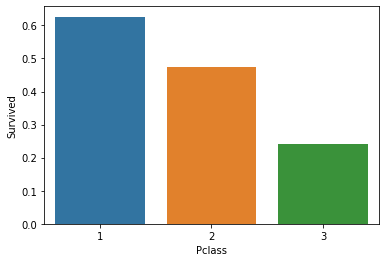

In [16]:
sns.barplot(data = train, x = "Pclass", y = "Survived", ci = None)

Como se vió en el gráfico de barras, los pasajeros de clase alta tienen más probabilidades de sobrevivir que el resto.

####Survived-Sex

Sex              0         1
Survived                    
0         0.811092  0.257962
1         0.188908  0.742038


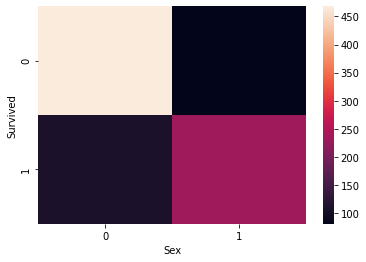

In [13]:
#1
train["Sex"] = train.Sex.apply(lambda x: int(x == "female"))
 
#2
aux = train[["Survived", "Sex","Pclass"]].groupby(["Survived", "Sex"]).count().reset_index()
 
#3
aux = aux.pivot("Survived", "Sex", "Pclass")

#4
print(aux / aux.sum())
 
#5
sns.heatmap(aux)

Este gráfico de calor (heatmap), vemos que existe una clara relación entre las variables Sex y Survived, pues la proporción de sobrevivientes es inversa dado el género del pasajero. ¿Cómo lo hicimos?

1.   Codificamos las variables categóricas como numéricas, en este caso el sexo masculino es 0, y el femenino 1. Esto lo hacemos con la función *lambda*.
2.   Creamos un Data Frame auxiliar donde guardamos la cantidad de pasajeros que sobrevivieron y la cantidad de pasajeros que no sobrevivieron, agrupados por sexo y clase.
3.   Encontramos relaciones entre las variables *Survived*, *Sex* y *Pclass* con la ayuda del método Pivot, el cual nos permite reorganizar los ejes de nuestra tabla auxiliar.
4.   Imprimimos el porcentaje de cada valor de nuestra tabla con respecto a la cantidad total de valores.
5. Realizamos el gráfico de calor, con el código sns.heatmap()

####Survived-Age

Para la relación entre las variables Survived-Age, realizamos un gráfico de caja (boxplot).

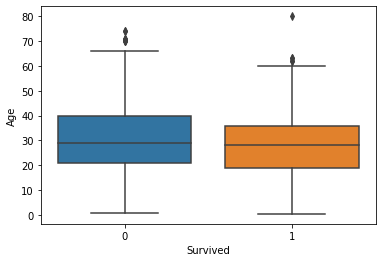

In [17]:
sns.boxplot(x="Survived", y="Age", data=train)

Con este gráfico podemos ver que la distribución de las edades, discriminadas por nuestra variable objetivo (Survived), presentan un alto solapamiento de sus rangos intercuartiles (IQR), lo que determina un comportamiento muy similar.

####Survived-SibSp

El siguiente gráfico de barras nos mostrará las probabiliadades de sobrevivir de los pasajeros cuyos hermanos y/o parejas sean también pasajeros. 

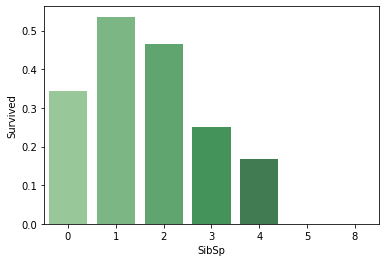

In [18]:
sns.barplot(data = train.sort_values(by = "SibSp", ascending=False), x = "SibSp", y = "Survived", palette="Greens_d", ci = None)

Como podemos apreciar, los pasajeros con un acompañante (ya sea hermano/a o pareja) tienen más probabilidades de estar vivos que el resto. Algo parecido ocurre en la siguiente relación Survived-Parch.

####Survived-Parch

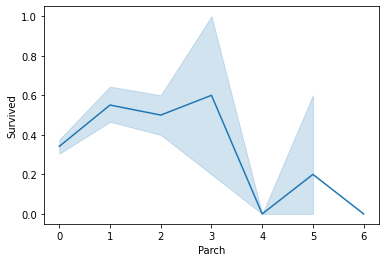

In [19]:
sns.lineplot(data=train, x = "Parch", y = "Survived")

Éste gráfico, llamado gráfico de línea (lineplot), nos muestra como influye los hijos y/o padres del pasajero que también sean pasajeros en las probabilidades de sobrevivir. Nos resultó curioso que los pasajeros sin acompañamiento tengan menos posibilidades que otros con 3.

####Survived-Fare

Para la relación entre estas dos variables, usamos un gráfico de barras similar al de los anteriores llamado *FacetGrid*. Podemos observar que más de 300 pasajeros que pagaron un precio menor no lograron sobrevivir.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


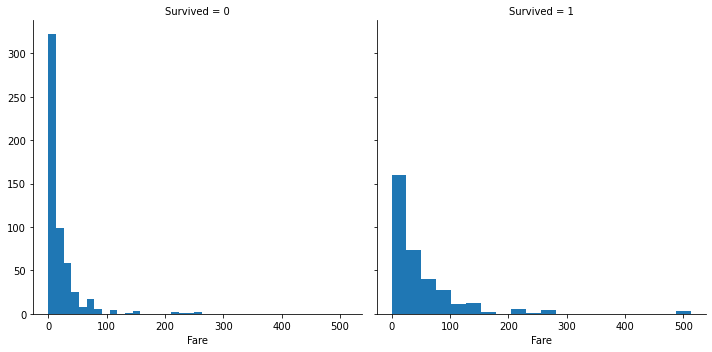

In [26]:
g = sns.FacetGrid(train, col="Survived", size=5)
g.map(plt.hist, "Fare", bins=20)

**6. Cree al menos una variable extra, expliquela y mencione por que considera que es adecuada, o no, para usar en el modelo.**



Crearemos la variable auxsp, la cual estudia como es la probabilidad de sobrevivir para cada combinación posible de las variables SibSp y Parch, relacioadas con nuestra variable objetivo *Survived*.
Esto lo podemos ver con un mapa de calor, mientras más oscuro sea el color, menor la probabiliad de sobrevivir.

Parch         0         1         2         3    4         5    6
SibSp                                                            
0      0.300935  0.657895  0.724138  1.000000  0.0  0.000000  NaN
1      0.520325  0.596491  0.631579  0.333333  0.0  0.333333  0.0
2      0.250000  0.857143  0.500000  1.000000  NaN       NaN  NaN
3      1.000000  0.000000  0.285714       NaN  NaN       NaN  NaN
4           NaN  0.000000  0.333333       NaN  NaN       NaN  NaN
5           NaN       NaN  0.000000       NaN  NaN       NaN  NaN
8           NaN       NaN  0.000000       NaN  NaN       NaN  NaN


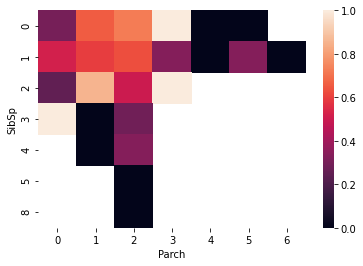

In [27]:
auxsp = train[["SibSp", "Parch","Survived"]].groupby(["SibSp", "Parch"]).agg(lambda x: sum(x)/len(x)).reset_index()
auxsp = auxsp.pivot("SibSp", "Parch", "Survived")
print(auxsp)
sns.heatmap(auxsp)

En este caso vemos que, pareciera haber una relación tal que, mientras Parch y SibSp son menores la probabilidad de sobrevivir es mayor. Para probar esto, primero crearemos una nueva variable Family que nos indicará si el pasajero tiene algún tipo de familiar a bordo.

Family       False    True 
Survived                   
0         0.699065  0.49435
1         0.300935  0.50565


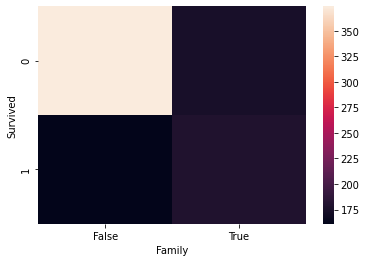

In [ ]:
train["Family"] = train.SibSp + train.Parch > 0
aux = train[["Survived", "Family","Pclass"]].groupby(["Survived", "Family"]).count().reset_index()
aux = aux.pivot("Survived", "Family", "Pclass")
print(aux / aux.sum())
sns.heatmap(aux)

En este caso, la variable pareciera tener un poco de poder predictivo pues, si el pasajero tiene familiares a bordo, la probabilidad de sobrevivir es del 50%, mientras que, sino tiene familiares a bordo la probabilidad de sobrevivir es de un 30%

Fare    0.0000    4.0125    5.0000    ...  262.3750  263.0000  512.3292
Pclass                                ...                              
1           0.00       NaN       0.0  ...       1.0       0.5       1.0
2           0.00       NaN       NaN  ...       NaN       NaN       NaN
3           0.25       0.0       NaN  ...       NaN       NaN       NaN

[3 rows x 247 columns]


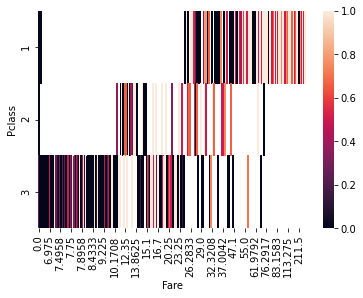

In [28]:
auxpcf = train[["Pclass", "Fare","Survived"]].groupby(["Pclass", "Fare"]).agg(lambda x: sum(x)/len(x)).reset_index()
auxpcf = auxpcf.pivot("Pclass", "Fare", "Survived")
print(auxpcf)
sns.heatmap(auxpcf)

En el anterior código, nuestra intención fue de elaborar una nueva variable, llamada *auxpcf* la cual nos permite saber como es la probabilidad de sobrevivir para cada combinación posible de las variables Pclass y Fare, relacionadas con Survived. Lo expresamos en un gráfico de calor (un poco complejo de leer), y vemos que hay una relación entre nuestras variables.

## Separación en entrenamiento y validación

Una vez que análizamos los datos y los tenemos limpios, corresponde hacer la separación entre los datos a usar para entrenar y para validar los modelos. 

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train.drop(columns=["Survived"]), 
    train.Survived, test_size=0.33, random_state=1
)

## Entrenamiento

Una vez separado los datos usamos los datos de entrenamiento para aprender los parámetros de nuestro modelo, en este caso usaremos una regresión logística.

In [30]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=0)

LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**7. Investigar otro modelo e implementar para comparar.**

Para este modelo alternativo, escogimos una técnica llamada *ElasticNet*, dicha técnica es un modelo de regresión lineal que fuerza a que los coeficientes del modelo tiendan a cero, minimizando así el riesgo de overfitting, reduciendo varianza, atenuado el efecto de la correlación entre predictores y reduciendo la influencia en el modelo de los predictores menos relevantes. A continuación lo importaremos en el bloque de código.

In [35]:
# Al usar otro modelo, los pasos son los mismos, primero debemos importarlo de la biblioteca.
from sklearn.linear_model import ElasticNet

# Luego debemos inicializar el modelo, leer en la documentación los parámetros que debe
# recibir el modelo.
alternativeModel = ElasticNet(random_state=0)

# Finalmente se entrena el mismo de la misma forma que entrenamos la regresión logística.
alternativeModel.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

# Prueba

Por último debemos probar todos los modelos que se entrenaron, para quedarnos con el de mejor desempeño. 

**8. Escoga el modelo con mejor desempeño.**

**8.1 Seleccione la métrica a evaluar y explique porque escogio esta métrica**


Seleccionamos la métrica Valor F, esto se debe a que nos pareció útil a la hora de realizar un modelo con buen desempeño, ya que combina tanto la exactitud como la precisión. El cálculo de la métrica elegida es el siguiente:
$ F = 2 * \frac{Precisión * Exhaustividad}{Precisión + Exhaustividad}$

**8.2 Calcule la métrica escogida para todos los modelos entrenados y selecciones el mejor.**

In [40]:
# Primero se deben obtener las predicciones de cada uno de los modelos para los  
# datos en el conjunto de validación.

# Primero debemos obtener las predicciones
pred = LogReg.predict(X_test)
predAlternativeModel = alternativeModel.predict(X_test)

# Luego cálculamos la métrica seleccionada.

# Precisión
precision = (pred + y_test == 2).sum() / pred.sum()

# Exhaustividad
recall = (pred + y_test == 2).sum() / y_test.sum()

# Valor F
fScore = 2 * precision * recall / (precision + recall)
print("Valor F: {}".format(fScore))

Valor F: 0.46987951807228917


Sacando nuestras conclusiones decimos que, según nuestra predicción, las probabilidades de sobrevivir de cada pasajero es de un 47%.